In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import *
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [3]:
df = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
AT    47840 non-null float64
V     47840 non-null float64
AP    47840 non-null float64
RH    47840 non-null float64
EP    47840 non-null float64
dtypes: float64(5)
memory usage: 1.8 MB


In [7]:
target = "EP"
y = np.log(df[target]) #outcome variable
X = df.copy() #feature matrix
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training r2:", metrics.r2_score(y_train, y_train_pred),
      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))

training r2: 0.92989286475448 
testing r2: 0.9294444312957376 
training mse: 9.787557016553567e-05 
testing mse: 9.882808699958435e-05


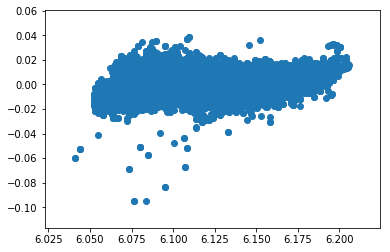

In [9]:
plt.scatter(y_test, y_test-y_test_pred)

In [10]:
import seaborn as sns

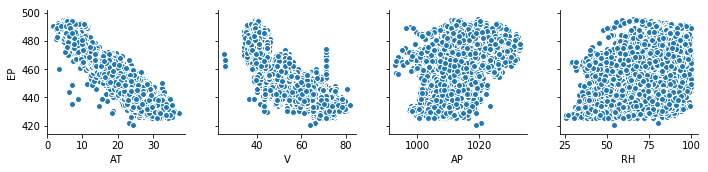

In [13]:
sns.pairplot(df, x_vars=X.columns, y_vars = ["EP"])

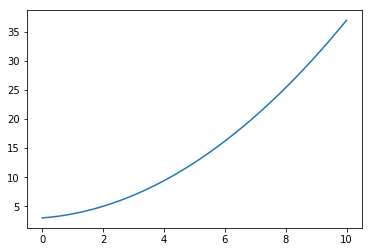

In [17]:
x = np.linspace(0, 10, 100)
y = 3 + 0.4 * x + 0.3 * (x **2)
plt.plot(x, y)